In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings

# Obtaining Data

### Loading CSV

In [2]:
def load_csv(file_name):
    return pd.read_csv(file_name)

In [3]:
file = './healthcare-dataset-stroke-data.csv'
df = load_csv(file)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Cleaning

### NaN values

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Cleaning BMI NaN values
def fill_na(df):
    df.fillna(np.mean(df['bmi']), inplace= True)

fill_na(df)


In [6]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Dropping unneccesery column

In [8]:
# Dropping unneccesery column
def drop_col(df, col):
    list_col = df.columns
    df.drop(col, axis  =1, inplace= True)

In [9]:
col = 'id'
drop_col(df, col)

In [10]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


### Detecting Outliers

In [11]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,5110.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.698018,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.800000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.400000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.800000,NaN,0.000000


### Box Plotting to detecting outliers.

C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Glucose'}, xlabel='avg_glucose_level'>

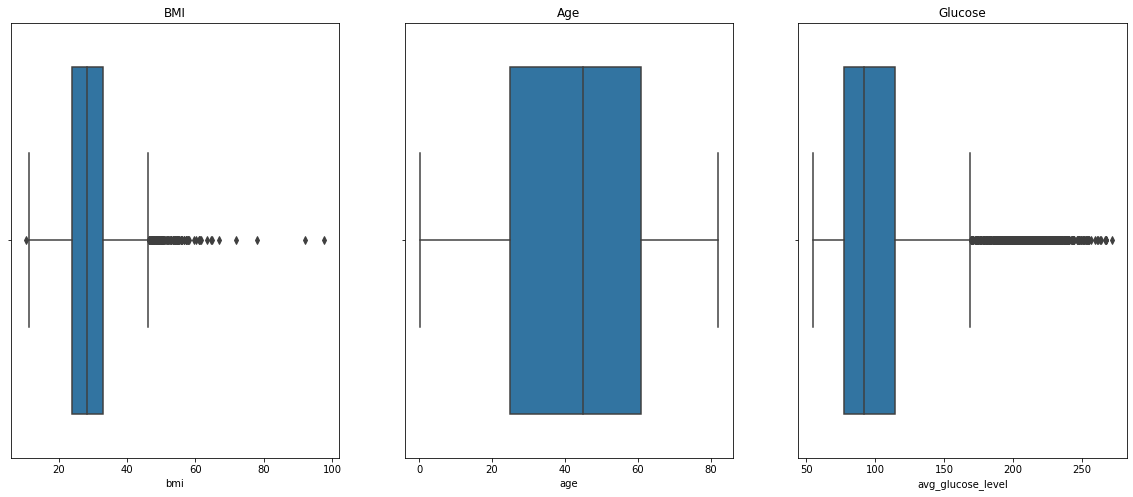

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,8))
ax1.set_title('BMI')
sns.boxplot(df['bmi'], ax=ax1)

ax2.set_title('Age')
sns.boxplot(df['age'], ax=ax2)

ax3.set_title('Glucose')
sns.boxplot(df['avg_glucose_level'], ax=ax3)

### Adressing BMI ouliers:
* BMI over 60 is not a real value, the Body mass index goes from 19 to 60.

<ipython-input-13-facbc969f7ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bmi[df.bmi>60] = np.nan
<ipython-input-13-facbc969f7ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bmi[df.bmi<19] = np.nan
C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pa

<AxesSubplot:title={'center':'Glucose'}, xlabel='avg_glucose_level'>

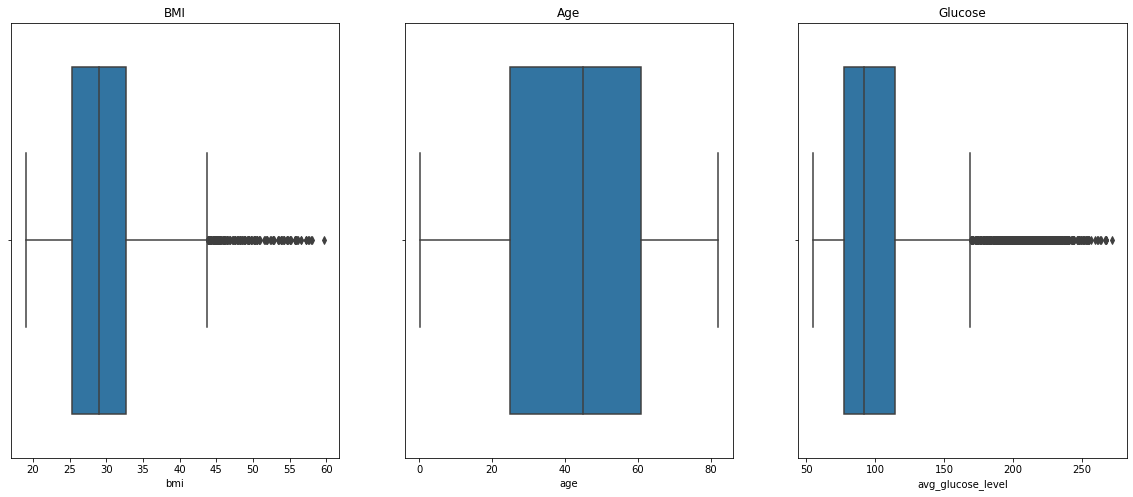

In [13]:
df.bmi[df.bmi>60] = np.nan
df.fillna(np.mean(df['bmi']), inplace= True)

df.bmi[df.bmi<19] = np.nan
df.fillna(np.mean(df['bmi']), inplace= True)
# Box plotting again to see if BMI outliers dropped.
# Box Plotting to detect outliers.
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,8))
ax1.set_title('BMI')
sns.boxplot(df['bmi'], ax=ax1)

ax2.set_title('Age')
sns.boxplot(df['age'], ax=ax2)

ax3.set_title('Glucose')
sns.boxplot(df['avg_glucose_level'], ax=ax3)

* There appears to be alot of outliers values outside the whiskers, 
* but actually those values are not outliers, and they are very important piece of information for our research.

In [14]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,5110.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,29.804379,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,6.520457,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,19.000000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,25.300000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,29.000000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,32.700000,NaN,0.000000


# Exploring & Data Analysis

## Questions we would like to answer:

* From the data that we want to explore the following questions came to mind:
* Subjects that smokes are more prone to having a stroke?
* High Glucose levels affects the risk of having a stroke?
* BMI levels affects the risk of having a stroke?
* What gender is more likley to have a strokes?
* A subject with heart disease is more prone to having a stroke?
* Subjects living area affect the chance of having a stroke?
* Hypertension is a cause of stroke?
* Subjects jobs kind affect the chance of having a stroke?
* Subjects of which age group are more likely to get a stroke?
* Is marriage a cause of strokes?

# Exploring Numeric data:

<AxesSubplot:title={'center':'Age\\Glucose'}, xlabel='age', ylabel='avg_glucose_level'>

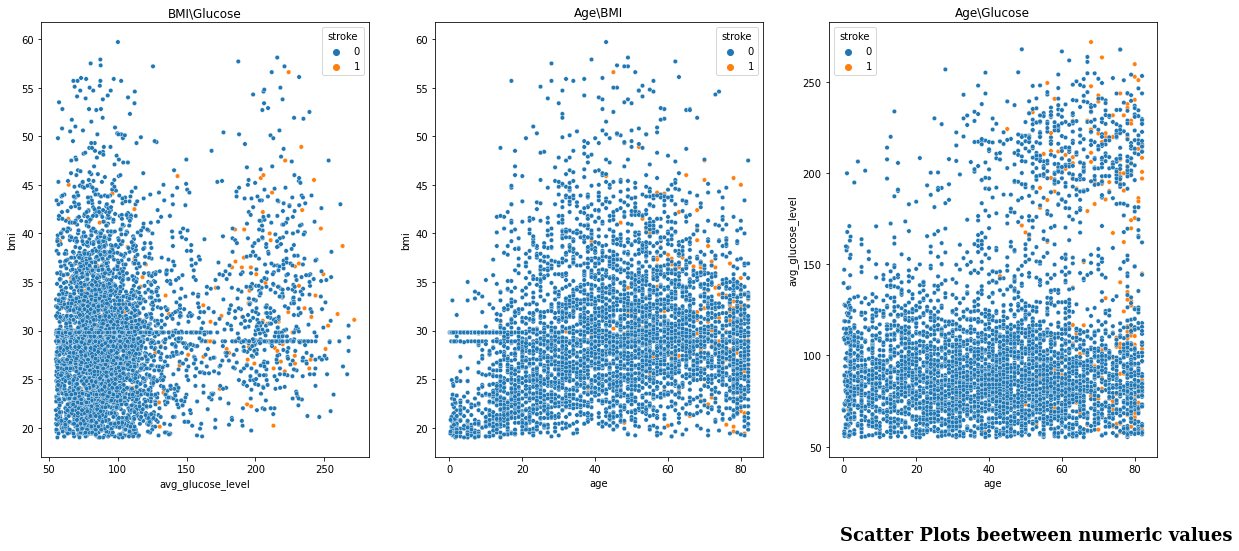

In [15]:
# Scatter plots beetween numeric values:
# To check the corrollation.
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,8))
plt.text(-1,-1,'Scatter Plots beetween numeric values',fontsize=18,fontweight='bold',fontfamily='serif')
ax1.set_title('BMI\Glucose')
sns.scatterplot(x='avg_glucose_level', y='bmi', s=20, hue = 'stroke', data=df, ax=ax1)

ax2.set_title('Age\BMI')
sns.scatterplot(x='age', y='bmi', s=20, hue = 'stroke', data=df, ax=ax2)

ax3.set_title('Age\Glucose')
sns.scatterplot(x='age', y='avg_glucose_level', s=20, hue = 'stroke', data=df, ax=ax3)



Partly answers 3 questions that we asked using simple scatter plots:

Q: High Glucose levels affects the risk of having a stroke?
* A1: We can see that the more older the subject is and the more high glucose levels in his blood, the more likley to having stroke.
* A2: We can see that that the more BMI the subject has and more high glucose levels, the more likley to having stroke.

Q: BMI levels affects the risk of having a stroke?

* A1: We can see that that the more BMI the subject has and more high glucose levels, the more likley to having stroke.
* A2: We can see that the more older the subject is and the more high his BMI value, the more likley to having stroke.

Q: Patients of which age group are more likely to get a stroke?

* A1: We can see that the more older the subject is and the more high his BMI value, the more likley to having stroke.
* A2: We can see that the more older the subject is and the more high glucose levels in his blood, the more likley to having stroke.

<AxesSubplot:>

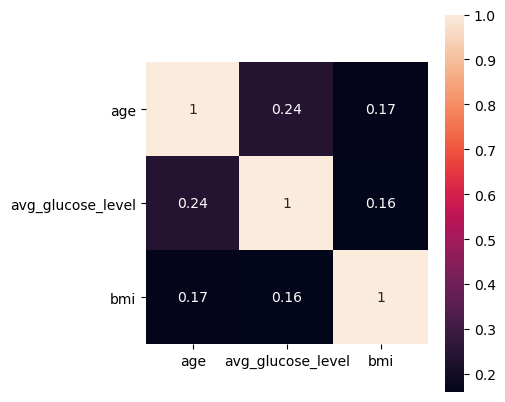

In [16]:
# Creating two sub data frames for exploration:
numeric_var = df[['age','avg_glucose_level','bmi']]
categorial_var = df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']]

# Using heatmap we can see the corrollation beetween the numeric values
fig=plt.figure(figsize=(10,5),dpi=100)
gs=fig.add_gridspec(1,2)
ax0=fig.add_subplot(gs[0,0])
axes=[ax0,ax1]
# heatmap of numerical data
corrmat = numeric_var.corr()
sns.heatmap(ax=ax0,data=corrmat,annot=True,square=True)


* We can observe that there is not much correlation, however the highest correlation are between Glucose\Age.
* Through that we can understand that there is a factor of people older having higher Glucose and that can affect them of having a stroke.

C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorel\anaconda3\lib\si

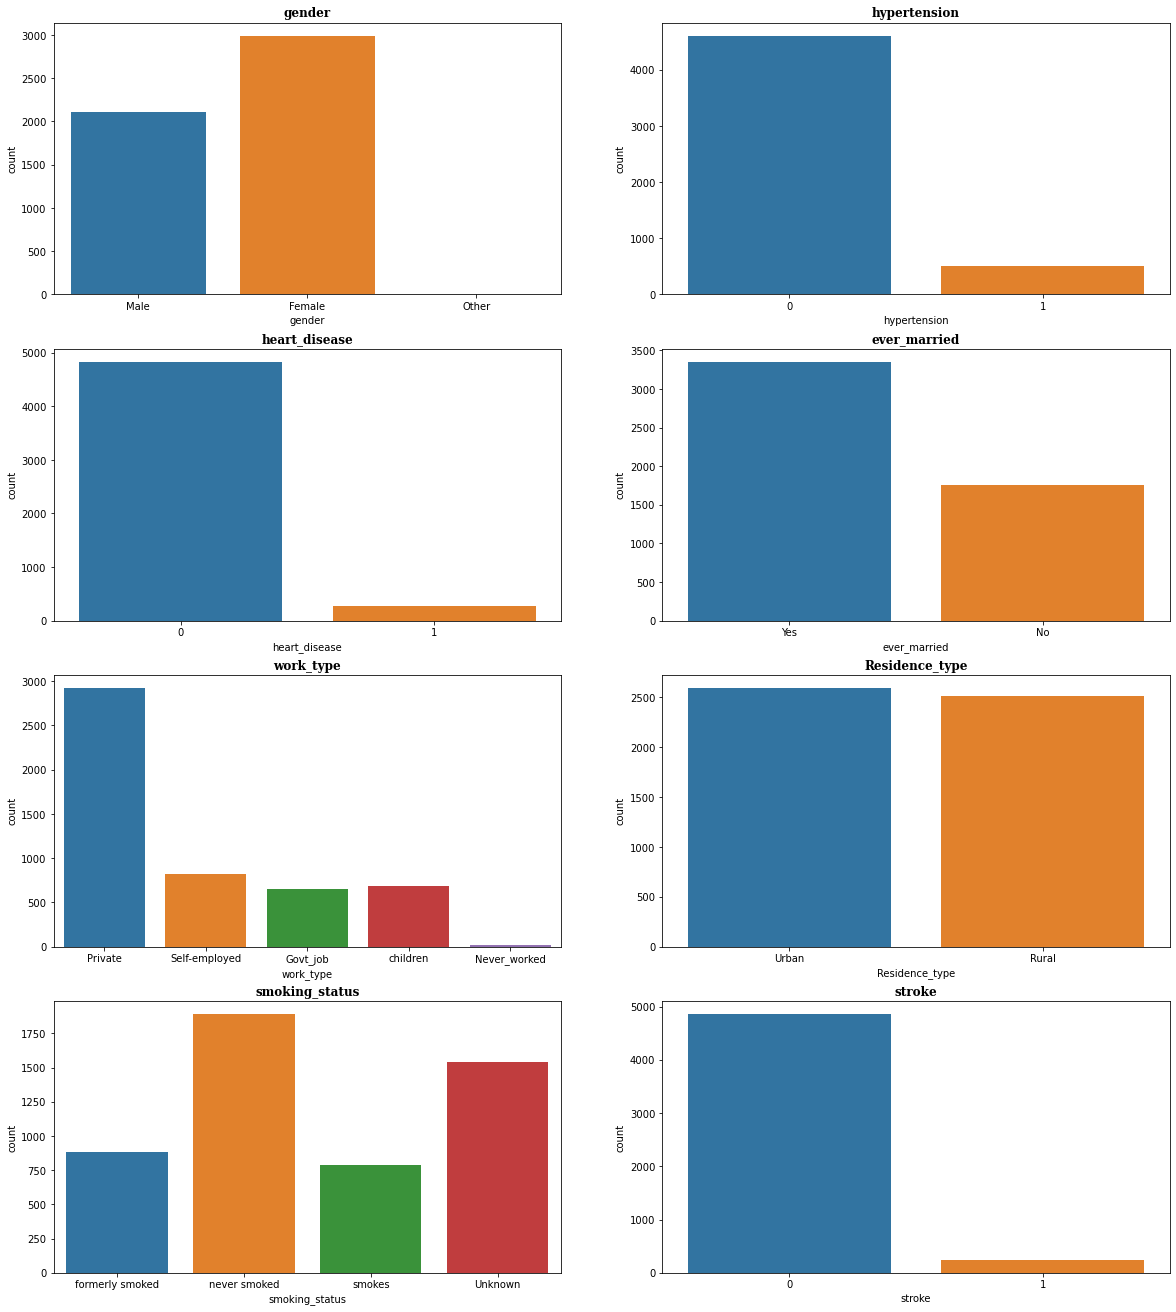

In [17]:
fig=plt.figure(figsize=(20,23))
for indx,val in enumerate(categorial_var.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    sns.countplot(categorial_var[val])

# After exploring categorial data we can see the following:

* There are more females than males.
* There are not alot of subjects who has Hypertensions.
* There are not alot of heart diesease among the subjects.
* The subjects who are married is way more than unmarried subjects, the avarage age is 42 it checks out.
* There are more subjects working in private sectors, the number of other sectors and children are kinda equal. Unemployed can be ignored.
* There is about the same amount of subjects living in urban or rural area.
* There is alot of Unknown category in the smoking_status, ???we will remove it from the model???.
* Never smoked are more than subjects who smoked/used to smoke.
* Number of subjects who had a strokes are less than 1000.

C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorel\anaconda3\lib\si

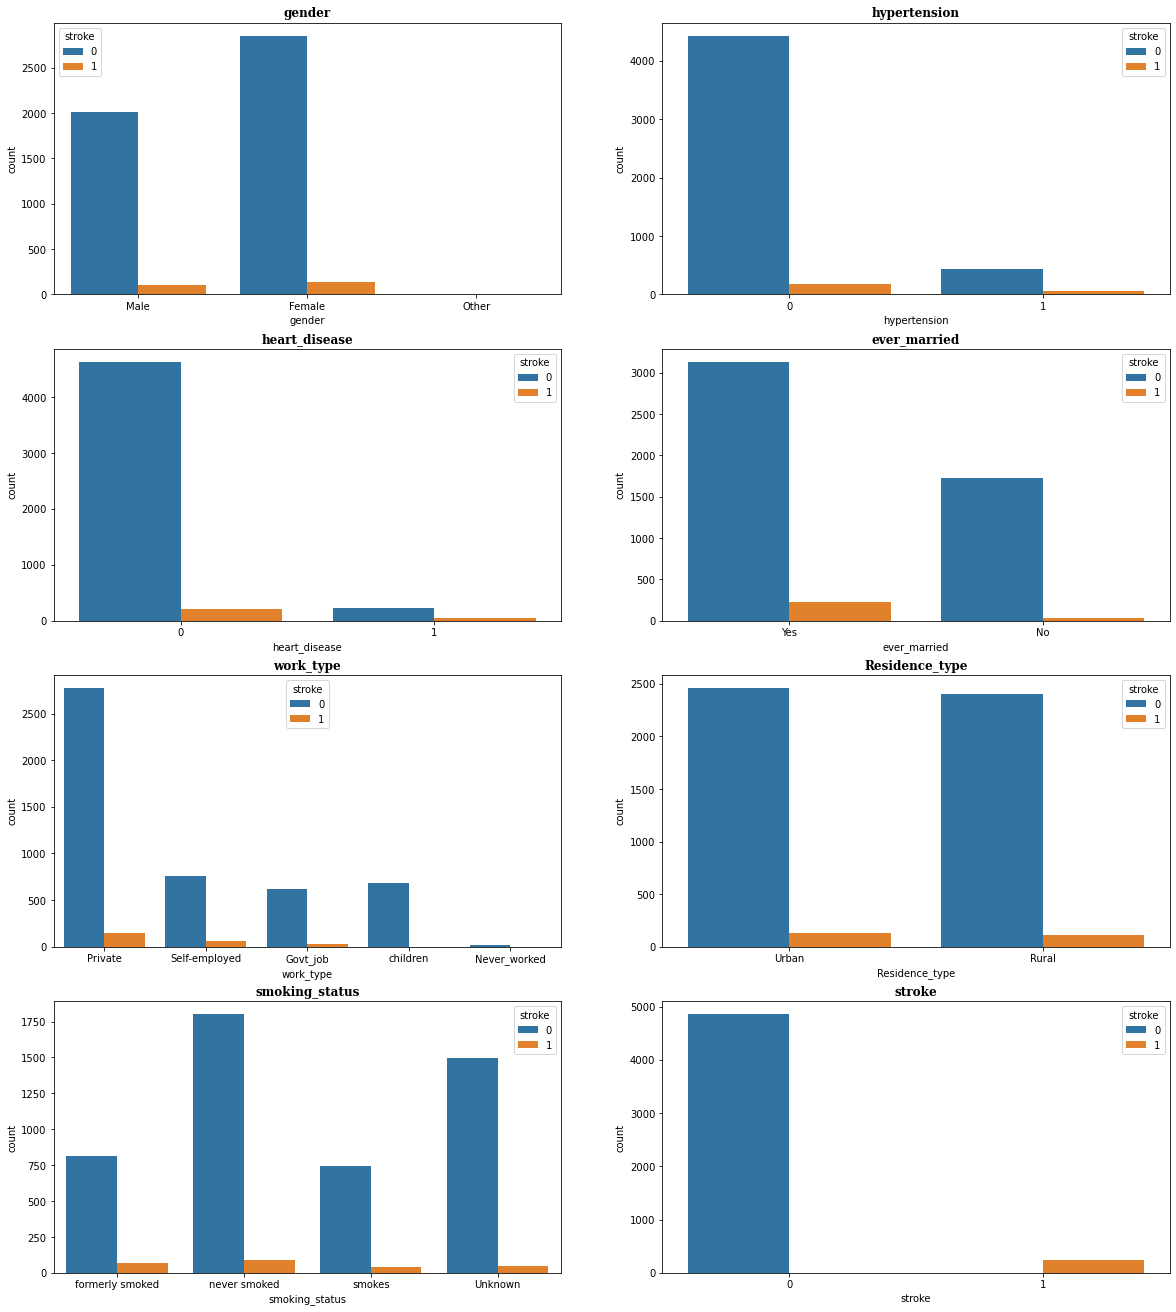

In [18]:
# Now count plotting the categorial data with stroke events:
fig=plt.figure(figsize=(20,23))
for index,val in enumerate(categorial_var.columns):
    ax=plt.subplot(4,2,index+1)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    sns.countplot(categorial_var[val],hue=df['stroke'])

Text(0.8, 100, 'Smoking Status and Stroke')

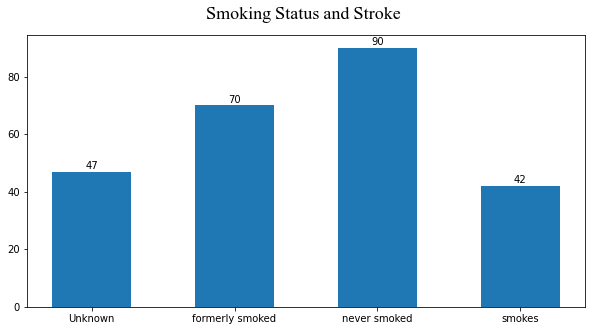

In [19]:
pd_stroke = pd.pivot_table(data=df[df['stroke']==1],index=df['smoking_status'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.bar(pd_stroke['smoking_status'],pd_stroke['stroke'],width=0.55,linewidth=0.7)
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an],xy=(pd_stroke['smoking_status'][an],pd_stroke['stroke'][an]+2),va='center',ha='center')
plt.text(0.8,100,'Smoking Status and Stroke',fontsize=18,fontfamily='david')

Text(0.15, 250, 'Marrital Status and Stroke')

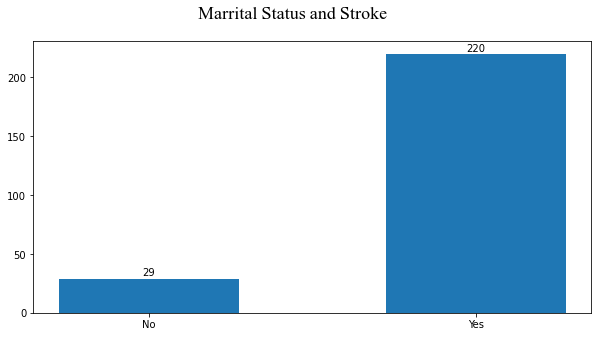

In [20]:
pd_stroke = pd.pivot_table(data=df[df['stroke']==1],index=df['ever_married'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.bar(pd_stroke['ever_married'],pd_stroke['stroke'],width=0.55,linewidth=0.7)
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an],xy=(pd_stroke['ever_married'][an],pd_stroke['stroke'][an]+5),va='center',ha='center')
plt.text(0.15,250,'Marrital Status and Stroke',fontsize=18,fontfamily='david')

Text(0.8, 170, 'Work Type and Stroke')

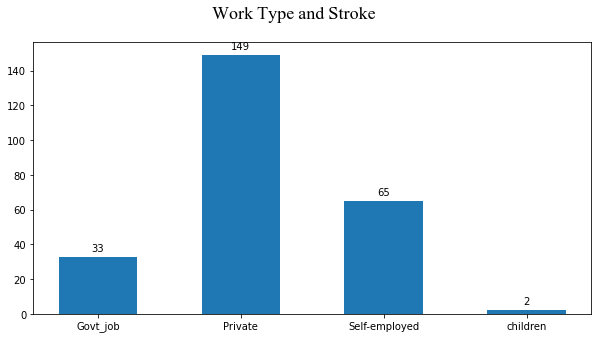

In [21]:
pd_stroke = pd.pivot_table(data=df[df['stroke']==1],index=df['work_type'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.bar(pd_stroke['work_type'],pd_stroke['stroke'],width=0.55,linewidth=0.7)
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an],xy=(pd_stroke['work_type'][an],pd_stroke['stroke'][an]+5),va='center',ha='center')
plt.text(0.8,170,'Work Type and Stroke',fontsize=18,fontfamily='david')

Text(0.15, 210, 'Hypertension and Stroke')

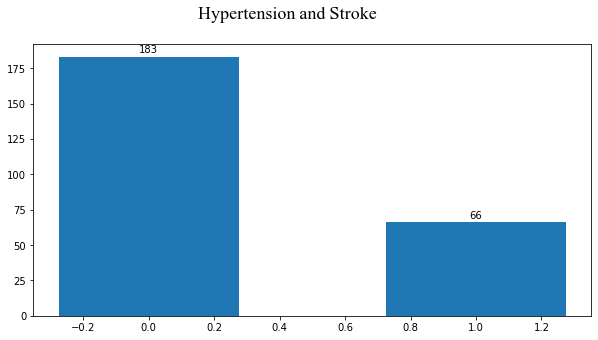

In [22]:
pd_stroke = pd.pivot_table(data=df[df['stroke']==1],index=df['hypertension'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.bar(pd_stroke['hypertension'],pd_stroke['stroke'],width=0.55,linewidth=0.7)
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an],xy=(pd_stroke['hypertension'][an],pd_stroke['stroke'][an]+5),va='center',ha='center')
plt.text(0.15,210,'Hypertension and Stroke',fontsize=18,fontfamily='david')

Text(0.17, 230, 'Heart Disease and Stroke')

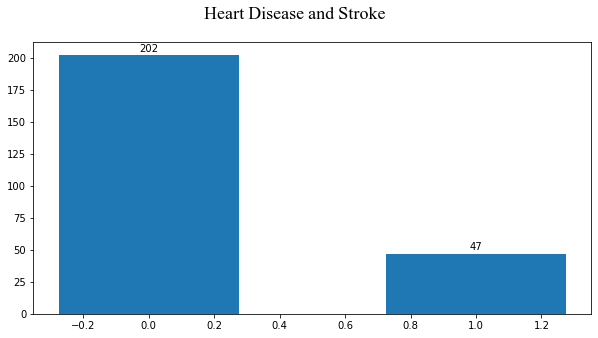

In [23]:
pd_stroke = pd.pivot_table(data=df[df['stroke']==1],index=df['heart_disease'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.bar(pd_stroke['heart_disease'],pd_stroke['stroke'],width=0.55,linewidth=0.7)
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an],xy=(pd_stroke['heart_disease'][an],pd_stroke['stroke'][an]+5),va='center',ha='center')
plt.text(0.17,230,'Heart Disease and Stroke',fontsize=18,fontfamily='david')

<AxesSubplot:>

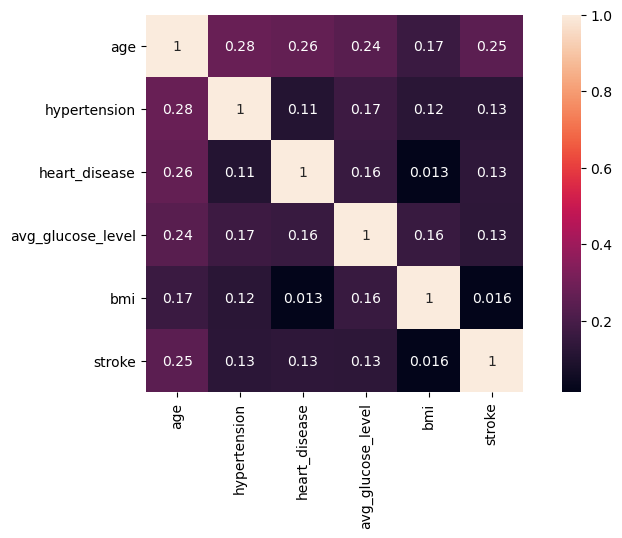

In [24]:
fig=plt.figure(figsize=(10,5),dpi=100)
gs=fig.add_gridspec(1,1)
ax0=fig.add_subplot(gs[0,0])
axes=[ax0,ax1]
# heatmap of numerical data
corrmat = df.corr()
sns.heatmap(ax=ax0,data=corrmat,annot=True,square=True)

## After exploring categorial data we can see the following:
* There are more females than males in this research and there is no obvious tendency to other gender to have a stroke.
* Subjects who do not have Hypertension having less stroke.
* Subjects who has heart disease are more likely to have a stroke.
* Subjects who got married show tendency to stroke way more than people who are unmarried(The avg age is 42.)
* Private employees seems to experience stroke more than other work_types. Self-employed people do show signs of stroke, Children are ignored.
* Almost no difference between subjects living in urban and rural areas in terms of stroke.
* Subjects who formerly smoked and who smokes (combined) are showing tendency of stroke way more than people who never smoked.

* No strong correlation between our variables.
* The highest correlation can be observed between age and hypertension (make sense the more you are older the more stress you may have).
* The weakest correlation can be observed between heart_disease and bmi.

# Getting Data ready for Machine Learning

* Encoding catgeorial to binary values.

In [25]:

l_en = LabelEncoder()
df['gender'] = l_en.fit_transform(df['gender'])
df['ever_married'] = l_en.fit_transform(df['ever_married'])
df['Residence_type'] = l_en.fit_transform(df['Residence_type'])

* Delete unknown smoking status.

In [26]:
df=df[df['smoking_status']!='Unknown']

* Hot Encoding

In [27]:
df_dummies = df[['smoking_status','work_type']]
df_dummies=pd.get_dummies(df_dummies)
df.drop(columns=['smoking_status','work_type'],inplace=True)

C:\Users\dorel\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


* Spiltting Data to X and y

In [28]:
y=df['stroke']
df.drop(columns=['stroke'],inplace=True)
X=df.merge(df_dummies,left_index=True, right_index=True,how='left')
X


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,0,77.93,21.700000,0,1,0,0,0,1,0,0
5105,0,80.0,1,0,1,1,83.75,28.893237,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,1,0


* Splitting into train and test sets.

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* A function for machine learning

In [30]:
def ML(model):
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test)*100
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    print(f'Accuracy Test Score: %.3f Precent' %score)
    return score

In [31]:
score_list = []

* Logistic Regression Model

In [32]:
lg_reg= LogisticRegression()
lg_score = ML(lg_reg)
score_list.append(lg_score)

Accuracy Test Score: 94.507 Precent


* Decision Tree Classifier Model

In [33]:
desc_tree= DecisionTreeClassifier()
desc_score = ML(desc_tree)
score_list.append(desc_score)

Accuracy Test Score: 90.583 Precent


* K-Neighbors Classifier Model

In [35]:
# Testing best k value for KNN
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X, y, cv=10)
scores_list=[cross_val_score(clf, X, y, cv=flds).mean() for flds in range(3,31)]
print("highest result with K-fold, k=",np.argmax(scores_list)+3)

highest result with K-fold, k= 5


In [36]:
KNN= KNeighborsClassifier(n_neighbors=5)
KNN_score = ML(KNN)
score_list.append(KNN_score)

Accuracy Test Score: 94.395 Precent


* Support vector machine ( Support Vector Calssifier) Model

In [37]:
SVM = SVC()
svm_score = ML(SVM)
score_list.append(svm_score)

Accuracy Test Score: 94.507 Precent


In [38]:
models = ['Logistics Regression', 'Decision Tree Classifier', 'KNN', 'SVM']
score_df = pd.DataFrame({"Model": models, "score": score_list})
score_df

,Model,score
0,Logistics Regression,94.506726
1,Decision Tree Classifier,90.582960
2,KNN,94.394619
3,SVM,94.506726


### We can see that "Decision Tree classifier" is only 90.5% accurate.
### "Logistic Regression", "K-Nearest Neighbours" and "SVM" accuracy of 94.5%!